In [3]:
#!pip install numpy scikit-learn mlxtend matplotlib pandas scipy statsmodels

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 29.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 28.4 MB/s eta 0:00:0031m41.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 31.4 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 31.9 MB/s eta 0:00:00m eta 0:00:010:0101
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 KB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 KB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 32.5 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.2 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 30.8 MB/s eta 0:00:00m eta 0:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 KB 19.2 MB

In [9]:
import numpy as np
import sklearn 
import mlxtend 
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from scipy.stats import shapiro 
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [10]:
df = pd.read_csv('ppi.csv', delimiter=',')

In [6]:
print(df.head())

   Unnamed: 0  domain  aa_ProtPosition  uniprot_id  Rlength sequence  \
0           0       0                1  A0A024RAV5      188        M   
1           1       0                2  A0A024RAV5      188        T   
2           2       0                3  A0A024RAV5      188        E   
3           3       0                4  A0A024RAV5      188        Y   
4           4       1                5  A0A024RAV5      188        K   

   normalized_length  normalized_abs_surf_acc  normalized_hydropathy_index  \
0           0.238095                 0.784319                     0.711111   
1           0.238095                 0.359207                     0.422222   
2           0.238095                 0.395387                     0.111111   
3           0.238095                 0.401655                     0.355556   
4           0.238095                 0.288103                     0.066667   

   rel_surf_acc  ...  9_wm_pssm_K  9_wm_pssm_M  9_wm_pssm_F  9_wm_pssm_P  \
0         0.803  ...  

original length:


,Unnamed: 0,aa_ProtPosition,Rlength,normalized_length,normalized_abs_surf_acc,normalized_hydropathy_index,rel_surf_acc,prob_sheet,prob_helix,prob_coil,...,9_wm_pssm_L,9_wm_pssm_K,9_wm_pssm_M,9_wm_pssm_F,9_wm_pssm_P,9_wm_pssm_S,9_wm_pssm_T,9_wm_pssm_W,9_wm_pssm_Y,9_wm_pssm_V
0,0,1,188,0.238095,0.784319,0.711111,0.803,0.003,0.003,0.994,...,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111
1,1,2,188,0.238095,0.359207,0.422222,0.530,0.047,0.018,0.935,...,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111
2,2,3,188,0.238095,0.395387,0.111111,0.464,0.043,0.053,0.903,...,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111
3,3,4,188,0.238095,0.401655,0.355556,0.385,0.084,0.052,0.864,...,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111
4,4,5,188,0.238095,0.288103,0.066667,0.287,0.084,0.052,0.864,...,0.551832,0.302858,0.436017,0.238759,0.103980,0.105653,0.161544,0.060391,0.140326,0.481904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65145,65145,34,38,0.014881,0.210794,1.000000,0.233,0.086,0.191,0.723,...,0.382791,0.286923,0.374128,0.415754,0.109332,0.351726,0.330383,0.241807,0.334863,0.381730
65146,65146,35,38,0.014881,0.292872,0.111111,0.343,0.086,0.191,0.723,...,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111
65147,65147,36,38,0.014881,0.141193,0.455556,0.367,0.043,0.113,0.844,...,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111
65148,65148,37,38,0.014881,0.406473,0.111111,0.477,0.043,0.053,0.903,...,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111


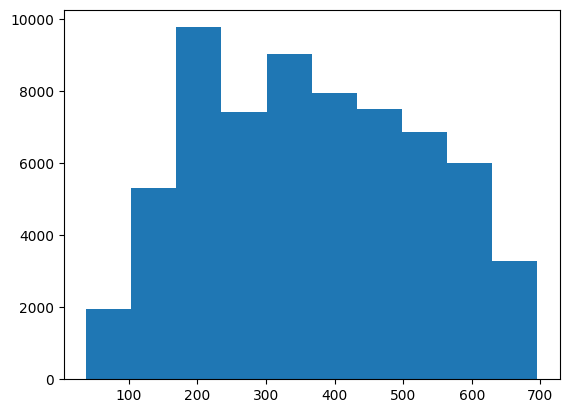

In [22]:
#do PCA for instance 
#look at the feature importance 
#plot some of the data
#preprocessing

features_remove = ["uniprot_id", 'domain','sequence', 'p_interface'] 

##Maybe use o	One-hot coding for the categorical features

df_without_categorical_feat = df.drop(features_remove, axis=1)

print("original length:")
plt.hist(df_without_categorical_feat['Rlength'])
display(df_without_categorical_feat)




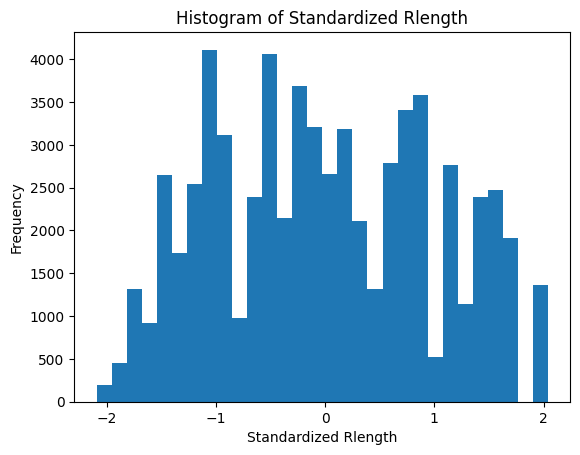

In [23]:


# Standardize the data
scaler = StandardScaler()
ppi_standardized = scaler.fit_transform(df_without_categorical_feat)

# Convert back to DataFrame with original column names
df_standardized = pd.DataFrame(ppi_standardized, columns=df_without_categorical_feat.columns)

# Plot the histogram for the 'Rlength' feature
plt.hist(df_standardized['Rlength'], bins=30)
plt.xlabel("Standardized Rlength")
plt.ylabel("Frequency")
plt.title("Histogram of Standardized Rlength")
plt.show()

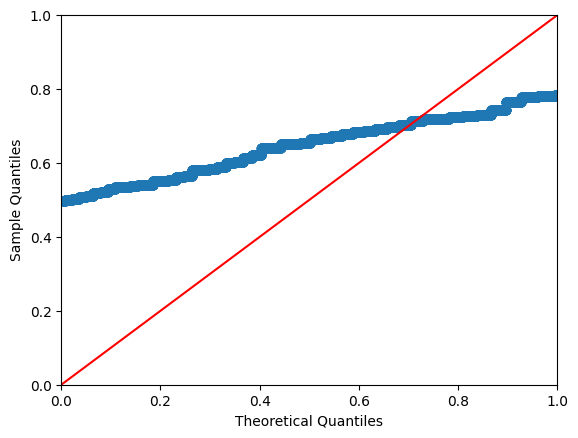

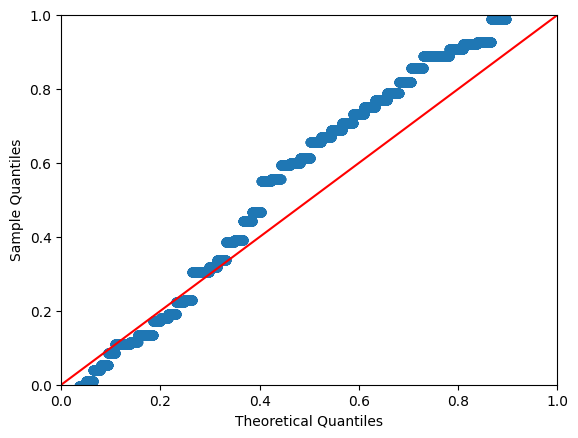

In [37]:
fig = sm.qqplot(df['normalized_length'], line='45')
plt.xlim(0, 1)  # Set x-axis limits
plt.ylim(0, 1)
plt.show()


fig = sm.qqplot(df_standardized['Rlength'], line='45')
plt.xlim(0, 1)  # Set x-axis limits
plt.ylim(0, 1)
plt.show()

/home/mary/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 65150.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=np.float64(0.9721817699642223), pvalue=np.float64(3.023422799671515e-72))

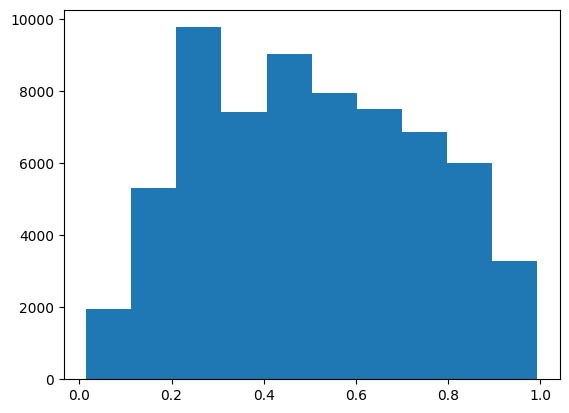

In [25]:
plt.hist(df['normalized_length'])
shapiro(df['normalized_length'])

In [30]:
display(df_standardized)

,Unnamed: 0,aa_ProtPosition,Rlength,normalized_length,normalized_abs_surf_acc,normalized_hydropathy_index,rel_surf_acc,prob_sheet,prob_helix,prob_coil,...,9_wm_pssm_L,9_wm_pssm_K,9_wm_pssm_M,9_wm_pssm_F,9_wm_pssm_P,9_wm_pssm_S,9_wm_pssm_T,9_wm_pssm_W,9_wm_pssm_Y,9_wm_pssm_V
0,-1.732024,-1.310175,-1.146461,-1.146461,7.023879,0.736706,5.409329,-1.028241,-1.033003,1.627307,...,-1.523793,-1.431424,-1.583774,-1.054671,-0.830205,-1.740545,-1.793890,-0.472752,-1.037900,-1.715047
1,-1.731971,-1.303083,-1.146461,-1.146461,2.255753,-0.120886,2.932627,-0.534644,-0.948817,1.279258,...,-1.523793,-1.431424,-1.583774,-1.054671,-0.830205,-1.740545,-1.793890,-0.472752,-1.037900,-1.715047
2,-1.731918,-1.295991,-1.146461,-1.146461,2.661548,-1.044446,2.333864,-0.579516,-0.752384,1.090486,...,-1.523793,-1.431424,-1.583774,-1.054671,-0.830205,-1.740545,-1.793890,-0.472752,-1.037900,-1.715047
3,-1.731865,-1.288899,-1.146461,-1.146461,2.731854,-0.318791,1.617163,-0.119573,-0.757996,0.860420,...,-1.523793,-1.431424,-1.583774,-1.054671,-0.830205,-1.740545,-1.793890,-0.472752,-1.037900,-1.715047
4,-1.731812,-1.281806,-1.146461,-1.146461,1.458236,-1.176383,0.728091,-0.119573,-0.757996,0.860420,...,1.909135,-0.298280,0.857008,-0.101927,-0.865421,-1.774678,-1.433309,-0.820817,-0.828897,1.263457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65145,1.731812,-1.076132,-2.088923,-2.088923,0.591125,1.594298,0.238194,-0.097136,0.022127,0.028642,...,0.592416,-0.392446,0.392081,1.219143,-0.838990,-0.235749,-0.226171,0.424144,0.562843,0.458777
65146,1.731865,-1.069040,-2.088923,-2.088923,1.511733,-1.044446,1.236132,-0.097136,0.022127,0.028642,...,-1.523793,-1.431424,-1.583774,-1.054671,-0.830205,-1.740545,-1.793890,-0.472752,-1.037900,-1.715047
65147,1.731918,-1.061948,-2.088923,-2.088923,-0.189527,-0.021933,1.453864,-0.579516,-0.415640,0.742437,...,-1.523793,-1.431424,-1.583774,-1.054671,-0.830205,-1.740545,-1.793890,-0.472752,-1.037900,-1.715047
65148,1.731971,-1.054855,-2.088923,-2.088923,2.785898,-1.044446,2.451802,-0.579516,-0.752384,1.090486,...,-1.523793,-1.431424,-1.583774,-1.054671,-0.830205,-1.740545,-1.793890,-0.472752,-1.037900,-1.715047


In [38]:
pca = PCA(n_components=10)

pca.fit(df_without_categorical_feat)
pca_results = pca.fit_transform(df_without_categorical_feat)

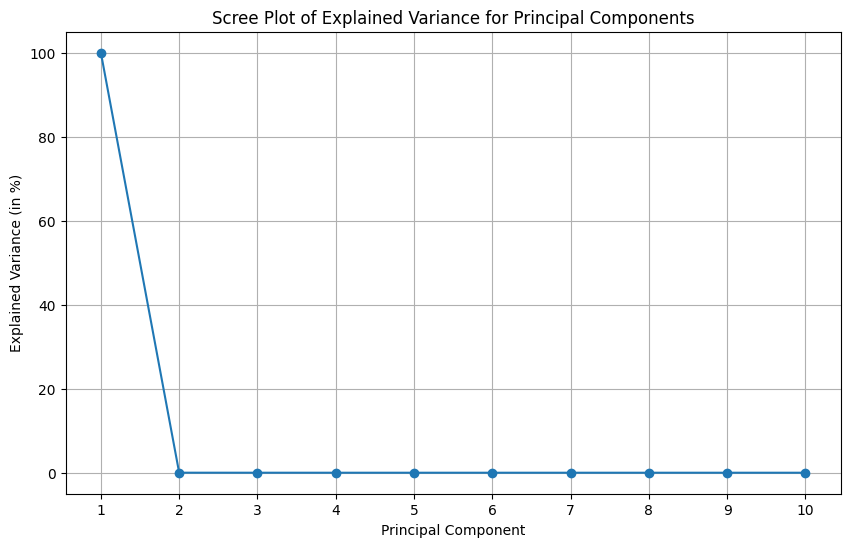

In [39]:
explained_variance = pca.explained_variance_ratio_

# Set figsize
plt.figure(figsize=(10, 6))

# Create a scree plot to visualize the explained variance
plt.plot(range(1, len(explained_variance) + 1), # x-axis
         explained_variance*100, # convert explained variance in percentage
         marker='o', # add a marker at each value
        )

# Add title and axis label
plt.title('Scree Plot of Explained Variance for Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (in %)')

# Add label to x-axis
plt.xticks(range(1, len(explained_variance) + 1))

# Add grid in the background
plt.grid(True)

# Display the chart
plt.show()


In [40]:
pca_stand = PCA(n_components=10)

pca_stand.fit(df_standardized)
pca_stand_results = pca.fit_transform(df_standardized)

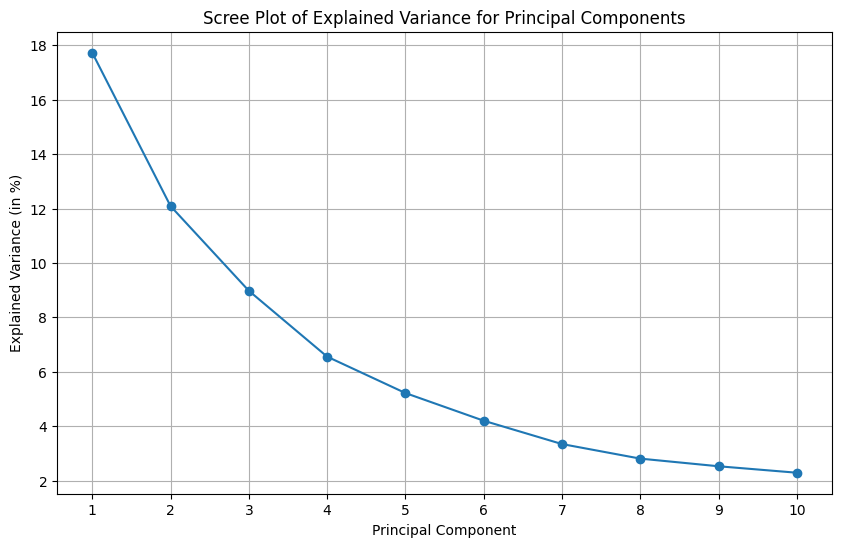

In [41]:
explained_variance = pca_stand.explained_variance_ratio_

# Set figsize
plt.figure(figsize=(10, 6))

# Create a scree plot to visualize the explained variance
plt.plot(range(1, len(explained_variance) + 1), # x-axis
         explained_variance*100, # convert explained variance in percentage
         marker='o', # add a marker at each value
        )

# Add title and axis label
plt.title('Scree Plot of Explained Variance for Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (in %)')

# Add label to x-axis
plt.xticks(range(1, len(explained_variance) + 1))

# Add grid in the background
plt.grid(True)

# Display the chart
plt.show()


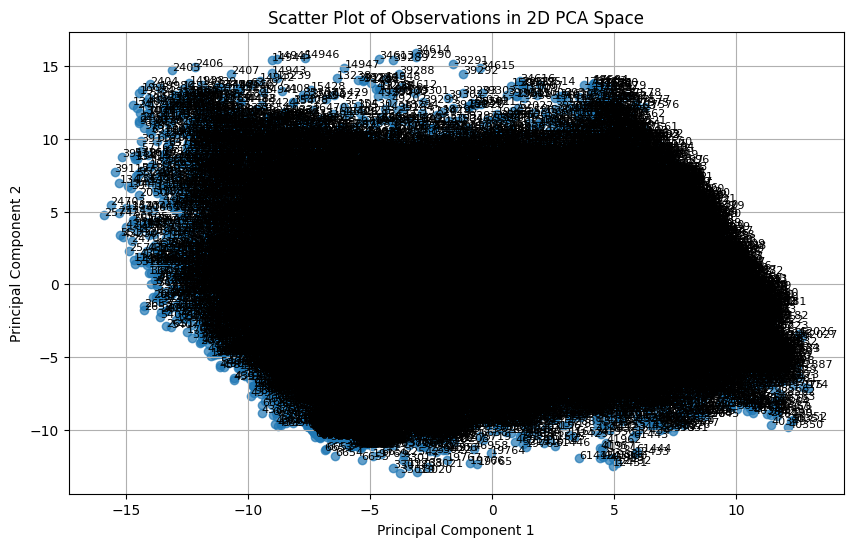

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_results[:, 0], # position on the first principal component of the observations
            pca_results[:, 1], alpha=0.7) # position on the second principal component of the observations

# Add title and axis label
plt.title('Scatter Plot of Observations in 2D PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# (optionally) Add labels to each point based on their index in the original dataframe
for i, txt in enumerate(df_wihtout_categorical_feat.index):
    plt.annotate(txt, (pca_results[i, 0], pca_results[i, 1]), fontsize=8)
    # This might be useful when doing outlier detection

# Add grid in the background
plt.grid(True)

# Display the chart
plt.show()

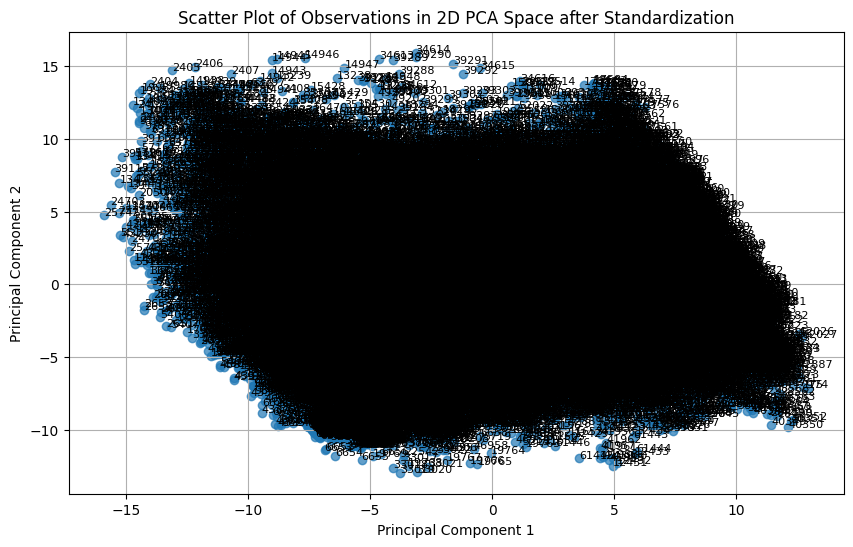

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_stand_results[:, 0], # position on the first principal component of the observations
            pca_stand_results[:, 1], alpha=0.7) # position on the second principal component of the observations

# Add title and axis label
plt.title('Scatter Plot of Observations in 2D PCA Space after Standardization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# (optionally) Add labels to each point based on their index in the original dataframe
for i, txt in enumerate(df_standardized.index):
    plt.annotate(txt, (pca_stand_results[i, 0], pca_stand_results[i, 1]), fontsize=8)
    # This might be useful when doing outlier detection

# Add grid in the background
plt.grid(True)

# Display the chart
plt.show()

In [2]:
!pip install ace_tools
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from tqdm import tqdm  # Progress bar



# Load dataset from ppi.csv
df = pd.read_csv("ppi.csv")

# Define target and features (drop uniprot_id, domain, and sequence)
target = "p_interface"
X = df.drop(columns=[target, "uniprot_id", "domain", "sequence"])
y = df[target]

# Identify categorical and numerical columns

# categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing Pipelines
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

#if we had categorical features
# cat_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('encoder', OneHotEncoder(handle_unknown='ignore'))
# ])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_features),
    # ('cat', cat_pipeline, categorical_features)
])

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate scale_pos_weight for XGBoost (ratio of negative to positive examples)
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos if pos > 0 else 1

# Define models with class weighting where applicable
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced'),
    "SVM": SVC(probability=True, class_weight='balanced'),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(50,), max_iter=500)
}

# Train and evaluate models with progress tracking using tqdm
results = []
for name, model in tqdm(models.items(), desc="Training models"):
    # Display current progress in console
    print(f"Training model: {name}")
    
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Compute ROC AUC if predict_proba is available
    if hasattr(model, 'predict_proba'):
        y_prob = pipeline.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
    else:
        roc_auc = None
    
    accuracy = accuracy_score(y_test, y_pred)
    # Compute F1 score with the minority class (class 1) as the positive label
    f1 = f1_score(y_test, y_pred, pos_label=1)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'F1 Score (minority)': f1,
        'ROC AUC': roc_auc
    })

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)




Defaulting to user installation because normal site-packages is not writeable


Training models:   0%|                                                        | 0/5 [00:00<?, ?it/s]

Training model: Logistic Regression


Training models:  20%|█████████▌                                      | 1/5 [00:04<00:17,  4.30s/it]

Training model: Random Forest


Training models:  40%|███████████████████▏                            | 2/5 [00:57<01:38, 32.87s/it]

Training model: SVM


Training models:  60%|█████████████████████████▏                | 3/5 [1:10:12<1:03:50, 1915.45s/it]

Training model: XGBoost


/home/mary/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:45:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
Training models:  80%|███████████████████████████████████▏        | 4/5 [1:10:17<19:21, 1161.15s/it]

Training model: Neural Network


Training models: 100%|█████████████████████████████████████████████| 5/5 [1:11:12<00:00, 854.56s/it]


In [3]:
print(results_df)


                 Model  Accuracy  F1 Score (minority)   ROC AUC
0  Logistic Regression  0.631005             0.306805  0.699997
1        Random Forest  0.879893             0.054381  0.851192
2                  SVM  0.728626             0.388870  0.789266
3              XGBoost  0.822180             0.454438  0.832069
4       Neural Network  0.847659             0.235067  0.705710


In [4]:
# Identify best model based on F1 Score for the minority class
best_model = results_df.loc[results_df['F1 Score (minority)'].idxmax()]
print("Best model based on F1 Score (minority):")
print(best_model)

Best model based on F1 Score (minority):
Model                   XGBoost
Accuracy                0.82218
F1 Score (minority)    0.454438
ROC AUC                0.832069
Name: 3, dtype: object


Results for Logistic Regression:

Confusion Matrix:
[[7158 4284]
 [ 524 1064]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.63      0.75     11442
           1       0.20      0.67      0.31      1588

    accuracy                           0.63     13030
   macro avg       0.57      0.65      0.53     13030
weighted avg       0.84      0.63      0.69     13030



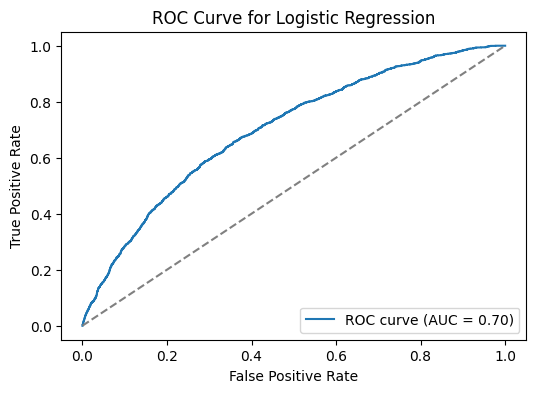


------------------------------------------------------------

Results for Random Forest:

Confusion Matrix:
[[11424    18]
 [ 1560    28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11442
           1       0.61      0.02      0.03      1588

    accuracy                           0.88     13030
   macro avg       0.74      0.51      0.48     13030
weighted avg       0.85      0.88      0.83     13030



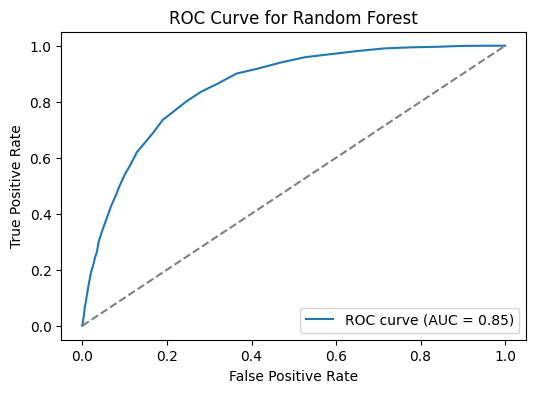


------------------------------------------------------------

Results for SVM:

Confusion Matrix:
[[8369 3073]
 [ 463 1125]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.73      0.83     11442
           1       0.27      0.71      0.39      1588

    accuracy                           0.73     13030
   macro avg       0.61      0.72      0.61     13030
weighted avg       0.86      0.73      0.77     13030



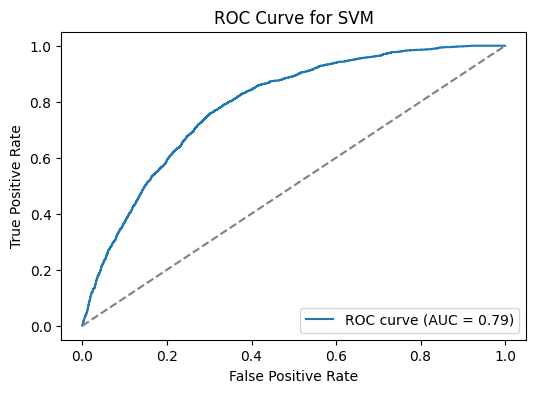


------------------------------------------------------------

Results for XGBoost:



/home/mary/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [15:57:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
[[9748 1694]
 [ 623  965]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89     11442
           1       0.36      0.61      0.45      1588

    accuracy                           0.82     13030
   macro avg       0.65      0.73      0.67     13030
weighted avg       0.87      0.82      0.84     13030



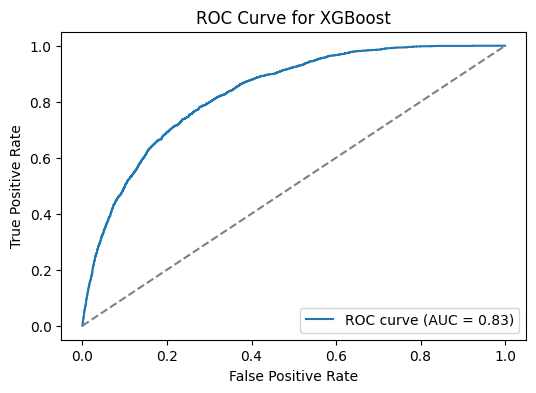


------------------------------------------------------------

Results for Neural Network:

Confusion Matrix:
[[10895   547]
 [ 1338   250]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     11442
           1       0.31      0.16      0.21      1588

    accuracy                           0.86     13030
   macro avg       0.60      0.55      0.57     13030
weighted avg       0.82      0.86      0.83     13030



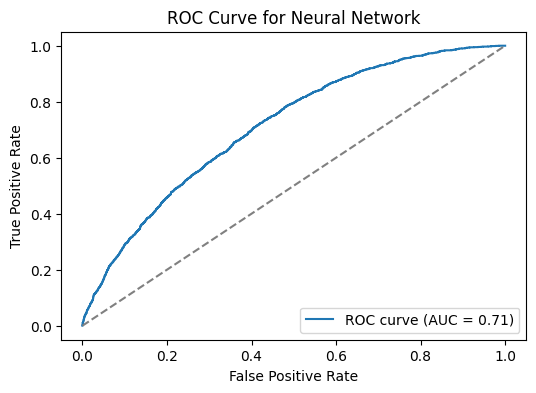


------------------------------------------------------------



In [5]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Iterate over each model
for name, model in models.items():
    print("="*60)
    print(f"Results for {name}:\n")
    
    # Build pipeline with preprocessing and the classifier
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Fit the pipeline and make predictions
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Display the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    # Display the classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Compute ROC curve and ROC AUC if the model supports probability predictions
    if hasattr(model, "predict_proba"):
        y_prob = pipeline.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        
        # Plot ROC curve
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {name}')
        plt.legend(loc="lower right")
        plt.show()
    else:
        print("ROC curve not available for this model.")
    
    print("\n" + "-"*60 + "\n")
